In [4]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
import psutil

# pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [5]:
# calendar.csv - Contains information about the dates on which the products are sold.
# sales_train_validation.csv - Contains the historical daily unit sales data per product and store [d_1 - d_1913]
# sample_submission.csv - The correct format for submissions. Reference the Evaluation tab for more info.
# sell_prices.csv - Contains information about the price of the products sold per store and date.
# Not available yet:

# sales_train_evaluation.csv - Available one month before competition deadline. Will include sales [d_1 - d_1941]
INPUT_DIR = ".\m5-forecasting-accuracy"#'C:\Users\luisd\OneDrive\Escritorio\Tesis\Revisión demanda de productos\m5-forecasting-accuracy'
cal = pd.read_csv(f'{INPUT_DIR}\calendar.csv')
stv = pd.read_csv(f'{INPUT_DIR}\sales_train_validation.csv')
ss = pd.read_csv(f'{INPUT_DIR}\sample_submission.csv')
sellp = pd.read_csv(f'{INPUT_DIR}\sell_prices.csv')

In [6]:
ss.head(),stv.head()

(                              id  F1  F2  F3  F4  F5  F6  F7  F8  F9  ...  \
 0  HOBBIES_1_001_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
 1  HOBBIES_1_002_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
 2  HOBBIES_1_003_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
 3  HOBBIES_1_004_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
 4  HOBBIES_1_005_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
 
    F19  F20  F21  F22  F23  F24  F25  F26  F27  F28  
 0    0    0    0    0    0    0    0    0    0    0  
 1    0    0    0    0    0    0    0    0    0    0  
 2    0    0    0    0    0    0    0    0    0    0  
 3    0    0    0    0    0    0    0    0    0    0  
 4    0    0    0    0    0    0    0    0    0    0  
 
 [5 rows x 29 columns],
                               id        item_id    dept_id   cat_id store_id  \
 0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
 1  HOBBIES_

In [7]:
stv[["id","item_id","dept_id","cat_id","store_id"]].nunique(),stv['cat_id'].unique()


(id          30490
 item_id      3049
 dept_id         7
 cat_id          3
 store_id       10
 dtype: int64,
 array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object))

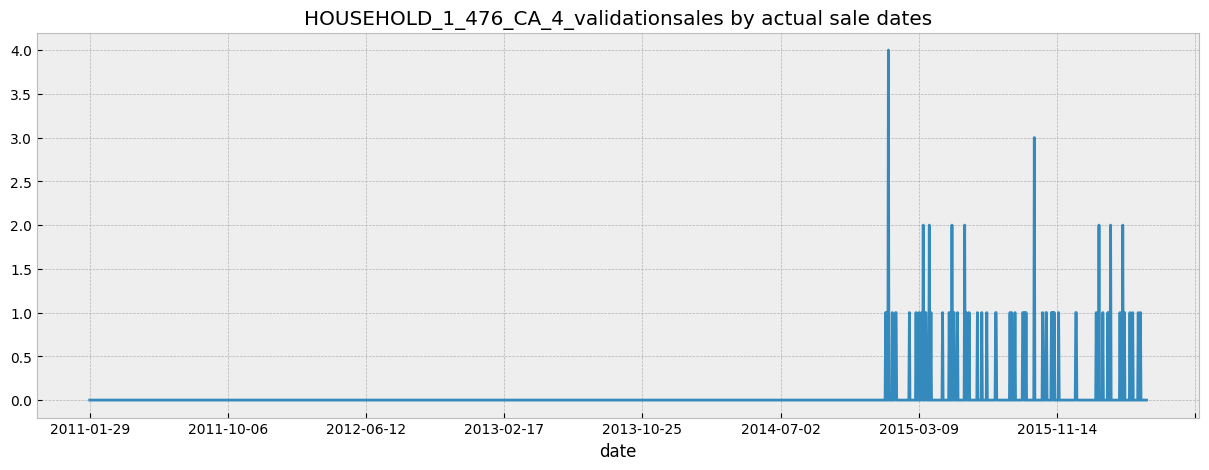

In [6]:
#visualización de una serie por productos

d_cols = [c for c in stv.columns if 'd_' in c] 
col_nam = stv["id"].sample(1).reset_index(drop=True)[0]
example = stv.loc[stv['id'] == col_nam][d_cols].T.reset_index()
example.columns=["d",col_nam]


example = example.merge(cal, how='left', on="d")
example.set_index('date')[col_nam] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title=col_nam + 'sales by actual sale dates')
plt.show()


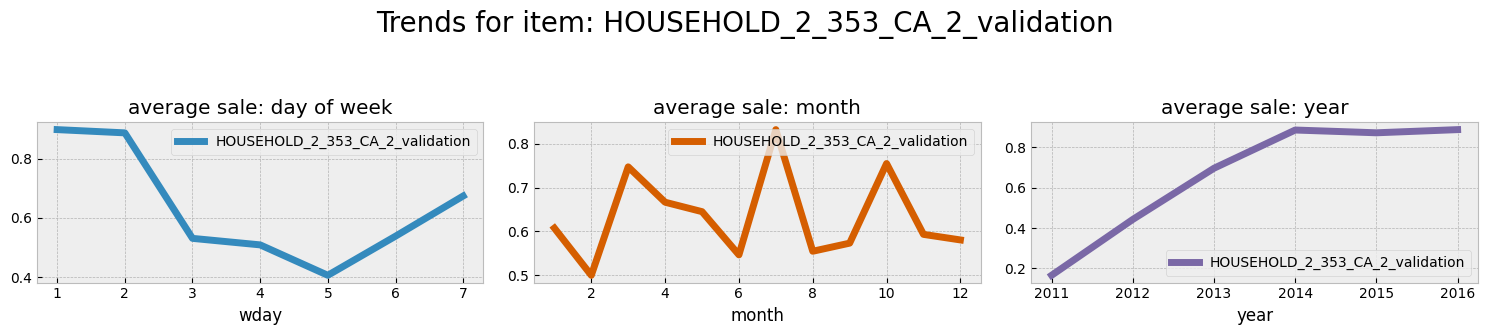

In [7]:
#Tendencias de los datos por días de la semana
col_nam = stv["id"].sample(1).reset_index(drop=True)[0]
example = stv.loc[stv['id'] == col_nam][d_cols].T.reset_index()
example.columns=["d",col_nam]

example = example.merge(cal, how='left', on="d")
examples = [col_nam]
example_df = [example]
for i in [0]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
    example_df[i].groupby('wday').agg({examples[i]:"mean"}).plot(kind='line',
              title='average sale: day of week',
              lw=5,
              color=color_pal[0],
              ax=ax1)
    example_df[i].groupby('month').agg({examples[i]:"mean"}).plot(kind='line',
              title='average sale: month',
              lw=5,
              color=color_pal[4],

              ax=ax2)
    example_df[i].groupby('year').agg({examples[i]:"mean"}).plot(kind='line',
              lw=5,
              title='average sale: year',
              color=color_pal[2],

              ax=ax3)
    fig.suptitle(f'Trends for item: {examples[i]}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    plt.show()

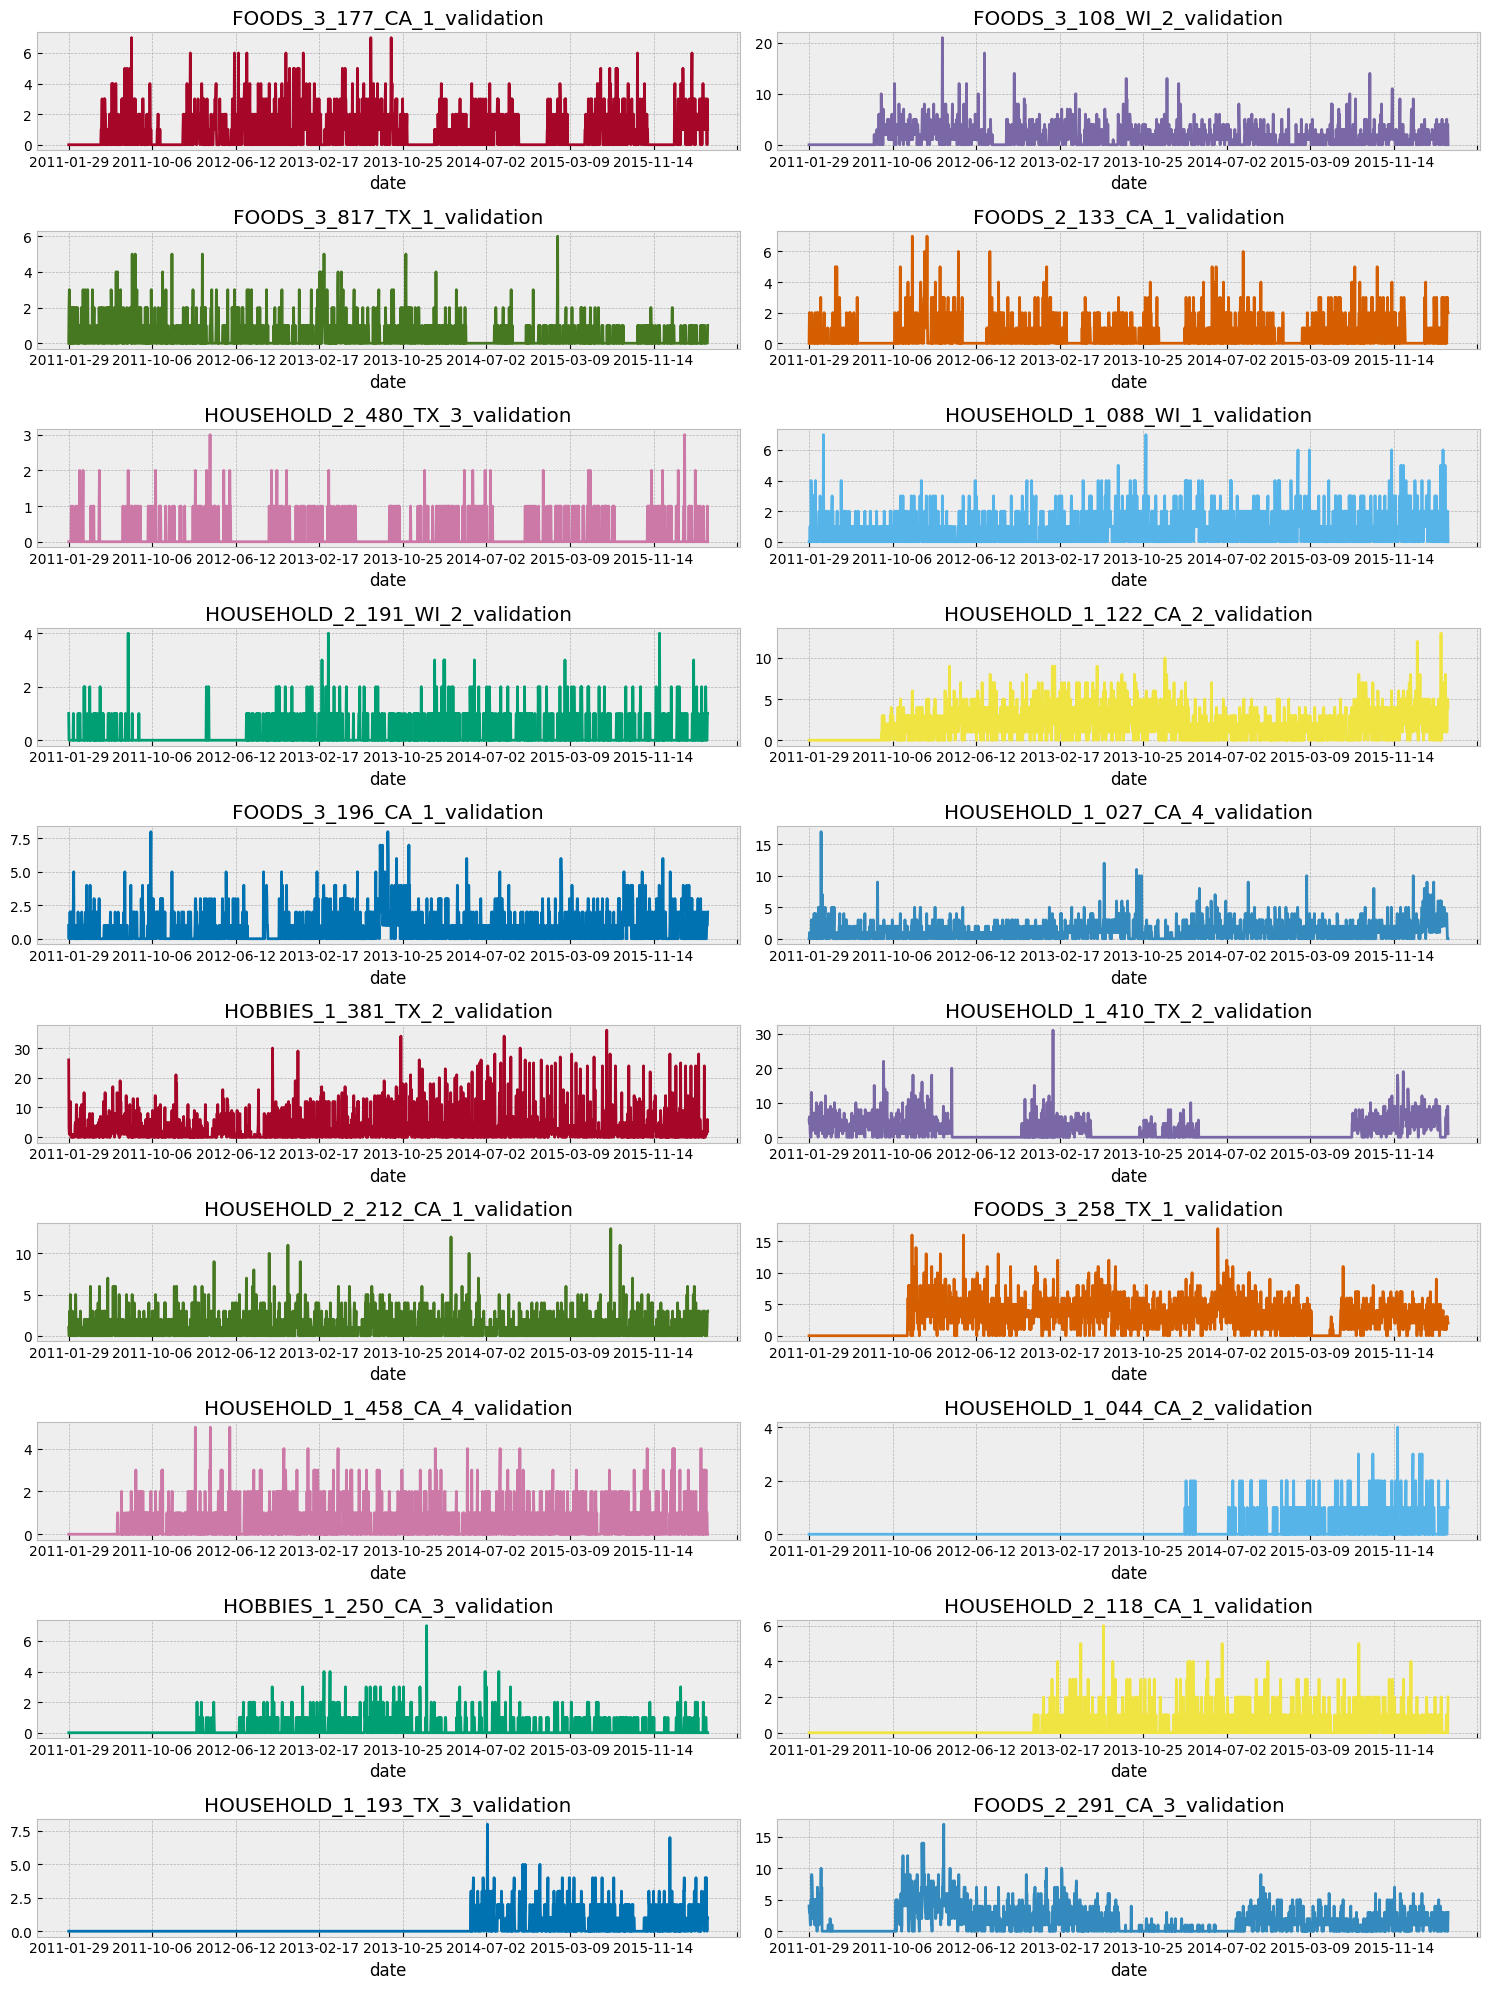

In [6]:
#Visualización de productos de varias series
twenty_examples = stv.sample(20) \
        .set_index('id')[d_cols] \
    .T \
    .merge(cal.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')
fig, axs = plt.subplots(10, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for item in twenty_examples.columns:
    twenty_examples[item].plot(title=item,
                              color=next(color_cycle),
                              ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

In [41]:
ss

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


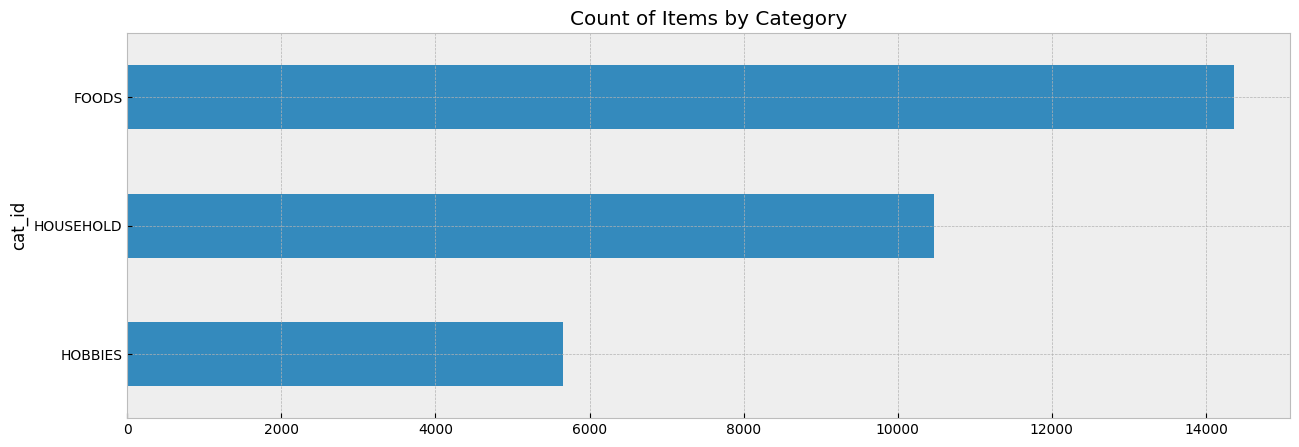

cat_id
FOODS        14370
HOBBIES       5650
HOUSEHOLD    10470
Name: id, dtype: int64

In [8]:
#Tamaño de las categorias
stv.groupby('cat_id').count()['id'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')
plt.show()
stv.groupby('cat_id').count()['id']

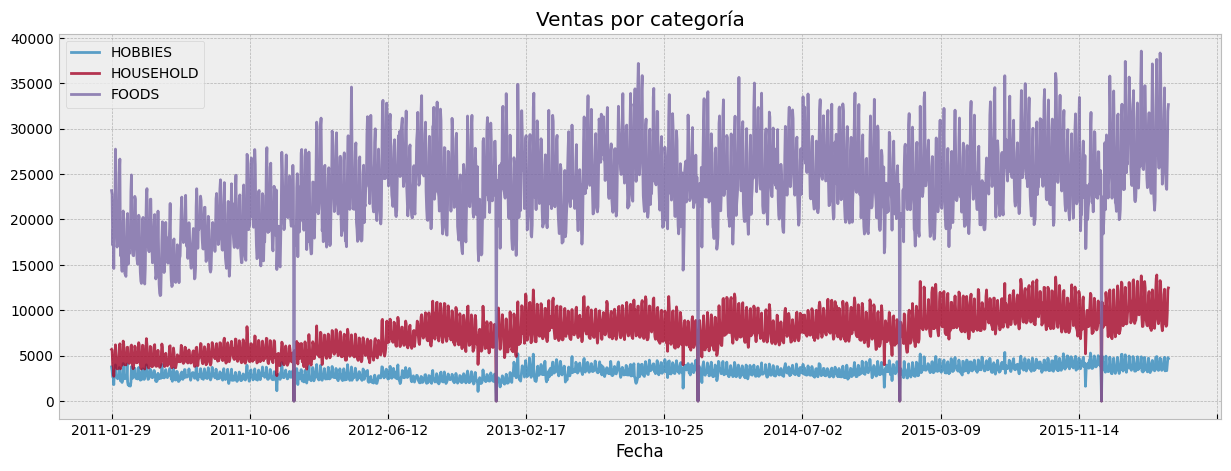

In [9]:
past_sales = stv.set_index('id')[d_cols] \
    .T \
    .merge(cal.set_index('d').rename({"date":"Fecha"},axis=1)['Fecha'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('Fecha')


for i in stv['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    past_sales[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Ventas por categoría')
plt.legend(stv['cat_id'].unique())
plt.show()

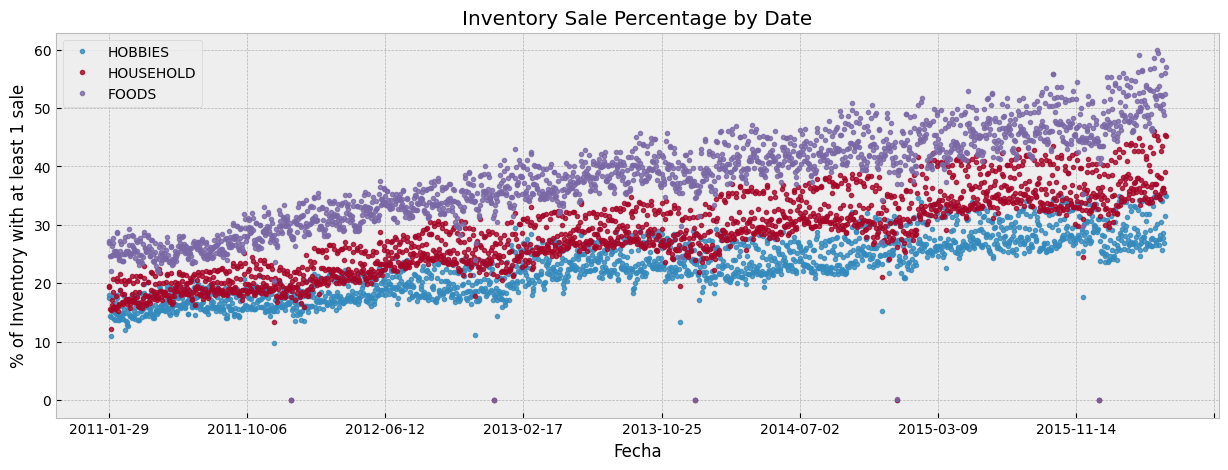

In [13]:
past_sales_clipped = past_sales.clip(0, 1)
for i in stv['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    (past_sales_clipped[items_col] \
        .mean(axis=1) * 100) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Inventory Sale Percentage by Date',
              style='.')
plt.ylabel('% of Inventory with at least 1 sale')
plt.legend(stv['cat_id'].unique())
plt.show()

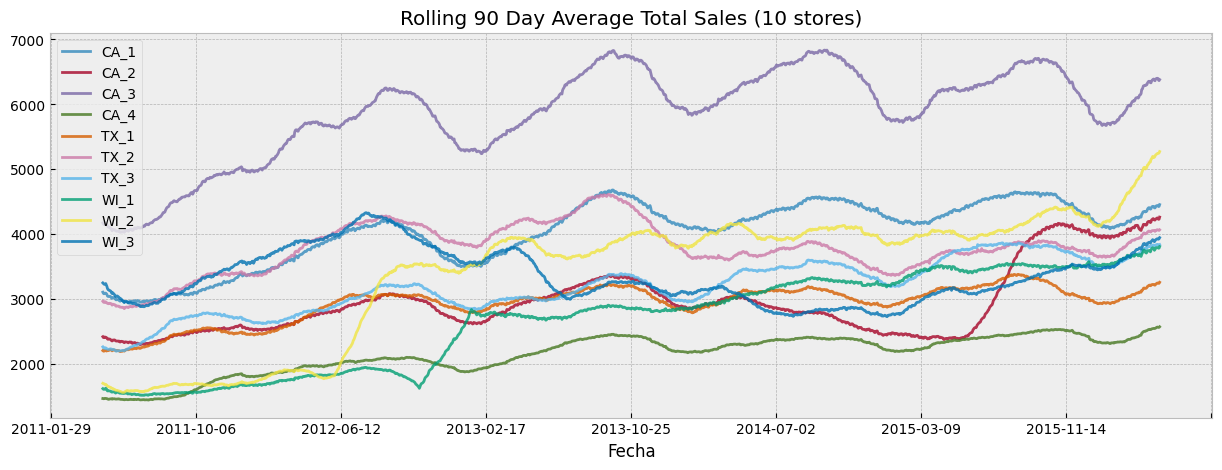

In [10]:
store_list = sellp['store_id'].unique()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(90).mean() \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Rolling 90 Day Average Total Sales (10 stores)')
plt.legend(store_list)
plt.show()

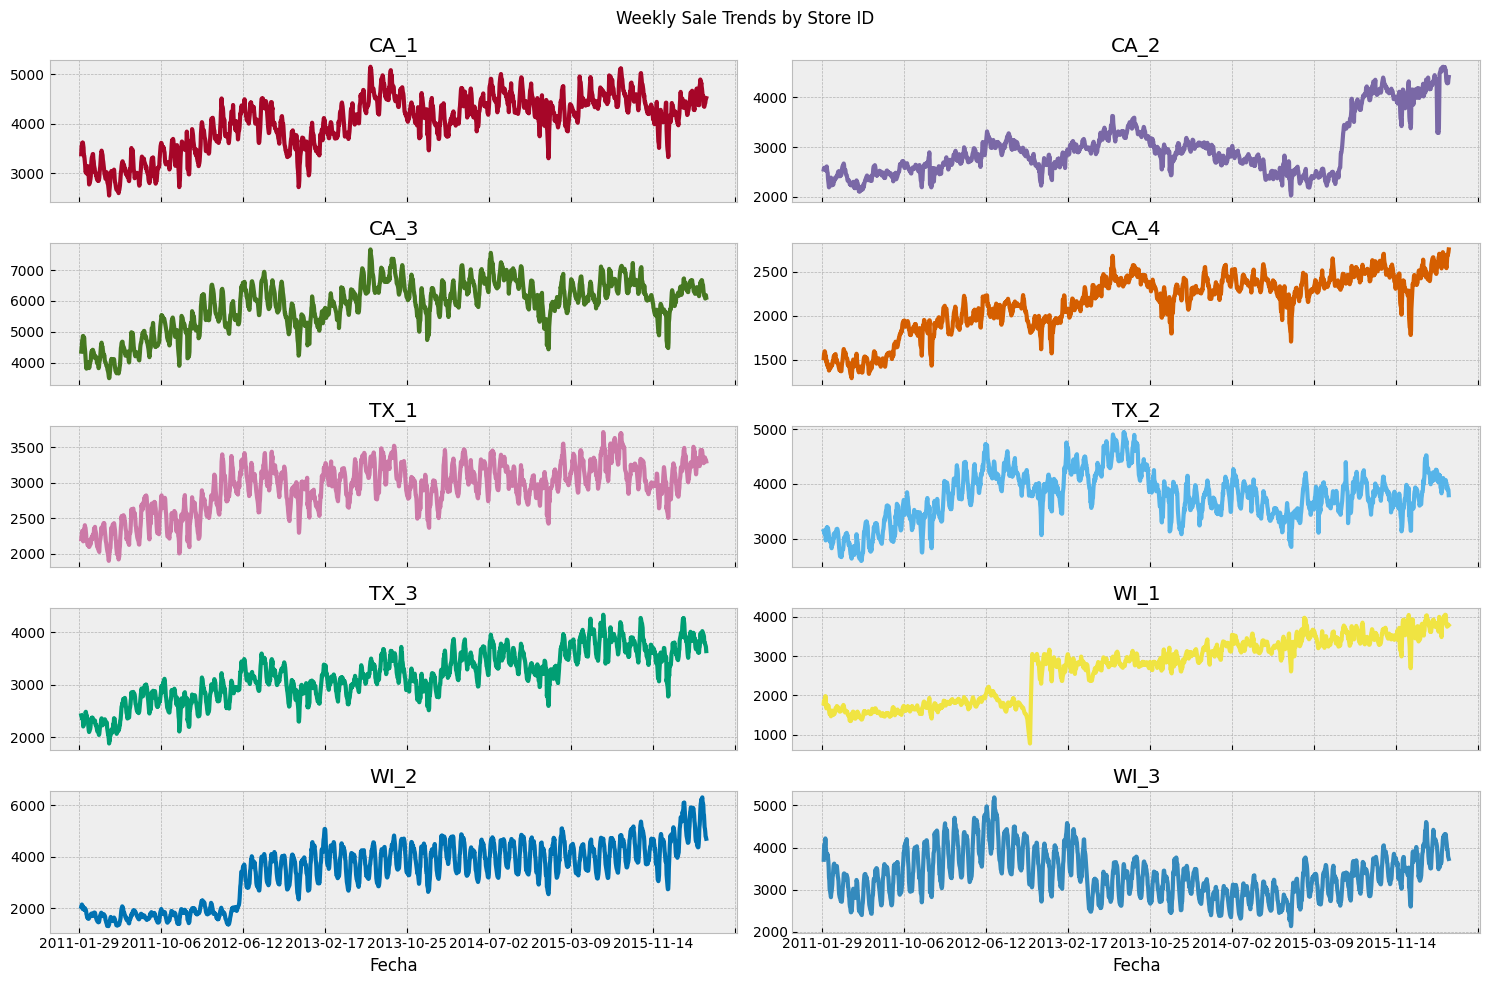

In [15]:
fig, axes = plt.subplots(5, 2, figsize=(15, 10), sharex=True)
axes = axes.flatten()
ax_idx = 0
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(7).mean() \
        .plot(alpha=1,
              ax=axes[ax_idx],
              title=s,
              lw=3,
              color=next(color_cycle))
    ax_idx += 1
# plt.legend(store_list)
plt.suptitle('Weekly Sale Trends by Store ID')
plt.tight_layout()
plt.show()


In [11]:
thirty_day_avg_map = stv.set_index('id')[d_cols[-30:]].mean(axis=1).to_dict()
fcols = [f for f in ss.columns if 'F' in f]
for f in fcols:
    ss[f] = ss['id'].map(thirty_day_avg_map).fillna(0)
ss

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,...,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667
1,HOBBIES_1_002_CA_1_validation,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,...,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333
2,HOBBIES_1_003_CA_1_validation,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,...,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667,0.566667
3,HOBBIES_1_004_CA_1_validation,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,...,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000,2.100000
4,HOBBIES_1_005_CA_1_validation,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,...,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60976,FOODS_3_824_WI_3_evaluation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60977,FOODS_3_825_WI_3_evaluation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60978,FOODS_3_826_WI_3_evaluation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
#array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)
i='HOUSEHOLD'
past_sales
items_col = [c for c in past_sales.columns if i in c]
past_cat=past_sales[items_col] \
        .sum(axis=1)


In [13]:
from sklearn.preprocessing import MinMaxScaler

#tratamiento de datos de fechas
dum=pd.get_dummies(cal[["event_type_1","event_type_2"]].fillna("Normal"),dtype="int")
"cultural normal religius"
for i in ["Cultural","Normal","Religious"]:
    dum["event_type_1_"+i]=dum["event_type_1_"+i]+dum["event_type_2_"+i]
    dum=dum.drop("event_type_2_"+i,axis=1)    

scaler = MinMaxScaler()
 
dum = pd.DataFrame(scaler.fit_transform(dum),columns=dum.columns)
cal1=pd.concat([cal.drop(["d","weekday","event_name_1","event_type_1","event_name_2","event_type_2","snap_CA","snap_TX","snap_WI"],axis=1),dum],axis=1)#dum
scaler = MinMaxScaler()

dum2=cal1[["wm_yr_wk","wday","month","year"]]
dum2=pd.DataFrame(scaler.fit_transform(dum2),columns=dum2.columns)

cal2=pd.concat([cal1.drop(["wm_yr_wk","wday","month","year"],axis=1),dum2,pd.get_dummies(cal["event_name_1"].fillna("Normal1"),dtype="int")],axis=1)
cal2.head()


,date,event_type_1_Cultural,event_type_1_National,event_type_1_Normal,event_type_1_Religious,event_type_1_Sporting,wm_yr_wk,wday,month,year,...,OrthodoxEaster,Pesach End,PresidentsDay,Purim End,Ramadan starts,StPatricksDay,SuperBowl,Thanksgiving,ValentinesDay,VeteransDay
0,2011-01-29,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-30,0.0,0.0,1.0,0.0,0.0,0.0,0.166667,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-31,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2011-02-01,0.0,0.0,1.0,0.0,0.0,0.0,0.500000,0.090909,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2011-02-02,0.0,0.0,1.0,0.0,0.0,0.0,0.666667,0.090909,0.0,...,0,0,0,0,0,0,0,0,0,0


max corr order: 7


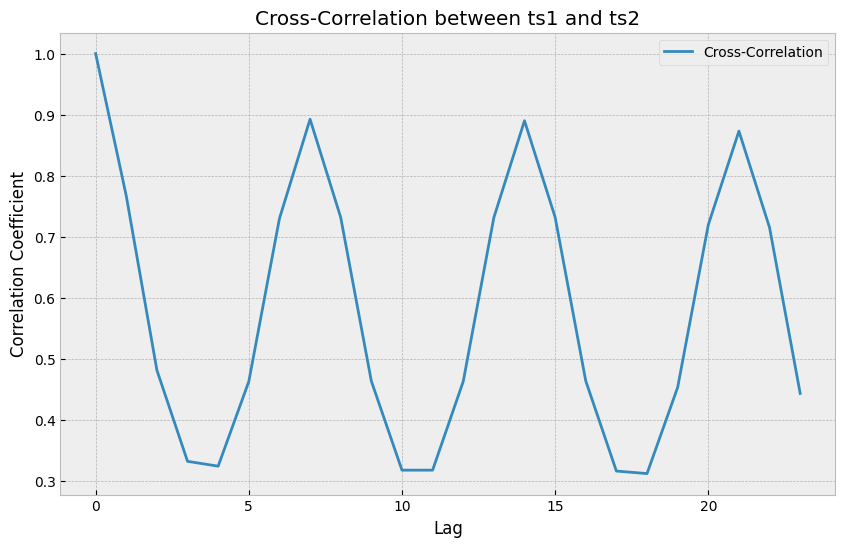

In [14]:
import matplotlib.pyplot as plt
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    datax=pd.concat([datax,datay.shift(lag)],axis=1)
    return datax.corr()

xcov_monthly =[[j for j in range(24)] ,[crosscorr(past_cat, past_cat, lag=i).iloc[0,1] for i in range(24)]]
order_max=xcov_monthly[1].index(max(xcov_monthly[1][1:]))

print("max corr order: "+str(order_max))
plt.figure(figsize=(10, 6))
plt.plot(xcov_monthly[0], xcov_monthly[1], label='Cross-Correlation')
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.title('Cross-Correlation between ts1 and ts2')
plt.legend()
plt.show()


In [12]:
import os
cpu_percent = psutil.cpu_percent()
process = psutil.Process(os.getpid())
mem_info = process.memory_info()
memory_mb = mem_info.rss / 1024 / 1024
cpu_percent,memory_mb

(3.8, 1344.77734375)

In [15]:
#array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)
# cat='HOUSEHOLD'
# cat='HOBBIES'
cat='FOODS'
past_sales
items_col = [c for c in past_sales.columns if cat in c]
past_cat=past_sales[items_col] \
        .sum(axis=1)
pd.DataFrame(past_cat,columns=[cat]).merge(cal2.set_index("date"),left_index=True, right_index=True)

,FOODS,event_type_1_Cultural,event_type_1_National,event_type_1_Normal,event_type_1_Religious,event_type_1_Sporting,wm_yr_wk,wday,month,year,...,OrthodoxEaster,Pesach End,PresidentsDay,Purim End,Ramadan starts,StPatricksDay,SuperBowl,Thanksgiving,ValentinesDay,VeteransDay
2011-01-29,23178,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
2011-01-30,22758,0.0,0.0,1.0,0.0,0.0,0.000000,0.166667,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
2011-01-31,17174,0.0,0.0,1.0,0.0,0.0,0.000000,0.333333,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
2011-02-01,18878,0.0,0.0,1.0,0.0,0.0,0.000000,0.500000,0.090909,0.0,...,0,0,0,0,0,0,0,0,0,0
2011-02-02,14603,0.0,0.0,1.0,0.0,0.0,0.000000,0.666667,0.090909,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-20,23632,0.0,0.0,1.0,0.0,0.0,0.982692,0.666667,0.272727,1.0,...,0,0,0,0,0,0,0,0,0,0
2016-04-21,23317,0.0,0.0,1.0,0.0,0.0,0.982692,0.833333,0.272727,1.0,...,0,0,0,0,0,0,0,0,0,0
2016-04-22,26704,0.0,0.0,1.0,0.0,0.0,0.982692,1.000000,0.272727,1.0,...,0,0,0,0,0,0,0,0,0,0
2016-04-23,31927,0.0,0.0,1.0,0.0,0.0,0.984615,0.000000,0.272727,1.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# results.summary(),results2.summary()
import os
cpu_percent = psutil.cpu_percent()
process = psutil.Process(os.getpid())
mem_info = process.memory_info()
memory_mb = mem_info.rss / 1024 / 1024
cpu_percent,memory_mb

(3.3, 1346.16015625)

In [35]:

#Busqueda de parametros SARIMAX
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
import warnings
# warnings.simplefilter('once', category=UserWarning)
# warnings.simplefilter('always', category=UserWarning)
warnings.filterwarnings('ignore') 
combinations = list(itertools.product([1, 2], repeat=6))

score=[]
for combo in combinations:
    print(combo)

    
    

    order = combo[:3]#(1, 1, 1)
    seasonal_order = tuple(list(combo[3:])+[order_max])#(1, 1, 1, 7)
    print(order,seasonal_order)
    model = SARIMAX(past_cat, order=order, seasonal_order=seasonal_order)
    model.initialize_approximate_diffuse()
    results = model.fit(disp=False)
    score.append(results.bic)

score_f=score[score.index(min(score))]
comb_f=combinations[score.index(min(score))]
order =combo[:3]#(1, 1, 1)# (1, 1, 1)
seasonal_order = tuple(list(combo[3:])+[7])#(1, 1, 1, 7)#(1, 2, 2,7)

model = SARIMAX(past_cat, order=order, seasonal_order=seasonal_order)
model.initialize_approximate_diffuse()
results = model.fit(disp=False)

import os
cpu_percent = psutil.cpu_percent()
process = psutil.Process(os.getpid())
mem_info = process.memory_info()
memory_mb = mem_info.rss / 1024 / 1024
cpu_percent,memory_mb


(1, 1, 1, 1, 1, 1)
(1, 1, 1) (1, 1, 1, 7)
(1, 1, 1, 1, 1, 2)
(1, 1, 1) (1, 1, 2, 7)
(1, 1, 1, 1, 2, 1)
(1, 1, 1) (1, 2, 1, 7)
(1, 1, 1, 1, 2, 2)
(1, 1, 1) (1, 2, 2, 7)
(1, 1, 1, 2, 1, 1)
(1, 1, 1) (2, 1, 1, 7)
(1, 1, 1, 2, 1, 2)
(1, 1, 1) (2, 1, 2, 7)
(1, 1, 1, 2, 2, 1)
(1, 1, 1) (2, 2, 1, 7)
(1, 1, 1, 2, 2, 2)
(1, 1, 1) (2, 2, 2, 7)
(1, 1, 2, 1, 1, 1)
(1, 1, 2) (1, 1, 1, 7)
(1, 1, 2, 1, 1, 2)
(1, 1, 2) (1, 1, 2, 7)
(1, 1, 2, 1, 2, 1)
(1, 1, 2) (1, 2, 1, 7)
(1, 1, 2, 1, 2, 2)
(1, 1, 2) (1, 2, 2, 7)
(1, 1, 2, 2, 1, 1)
(1, 1, 2) (2, 1, 1, 7)
(1, 1, 2, 2, 1, 2)
(1, 1, 2) (2, 1, 2, 7)
(1, 1, 2, 2, 2, 1)
(1, 1, 2) (2, 2, 1, 7)
(1, 1, 2, 2, 2, 2)
(1, 1, 2) (2, 2, 2, 7)
(1, 2, 1, 1, 1, 1)
(1, 2, 1) (1, 1, 1, 7)
(1, 2, 1, 1, 1, 2)
(1, 2, 1) (1, 1, 2, 7)
(1, 2, 1, 1, 2, 1)
(1, 2, 1) (1, 2, 1, 7)
(1, 2, 1, 1, 2, 2)
(1, 2, 1) (1, 2, 2, 7)
(1, 2, 1, 2, 1, 1)
(1, 2, 1) (2, 1, 1, 7)
(1, 2, 1, 2, 1, 2)
(1, 2, 1) (2, 1, 2, 7)
(1, 2, 1, 2, 2, 1)
(1, 2, 1) (2, 2, 1, 7)
(1, 2, 1, 2, 2, 2)
(1, 2, 1) (2, 2

(5.4, 472.72265625)

In [31]:
score_f,comb_f

(35071.490905382394, (1, 1, 2, 2, 1, 1))

c:\Users\luisd\OneDrive\Escritorio\Advance1\deep_enviroment2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\luisd\OneDrive\Escritorio\Advance1\deep_enviroment2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\luisd\OneDrive\Escritorio\Advance1\deep_enviroment2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Fecha'>

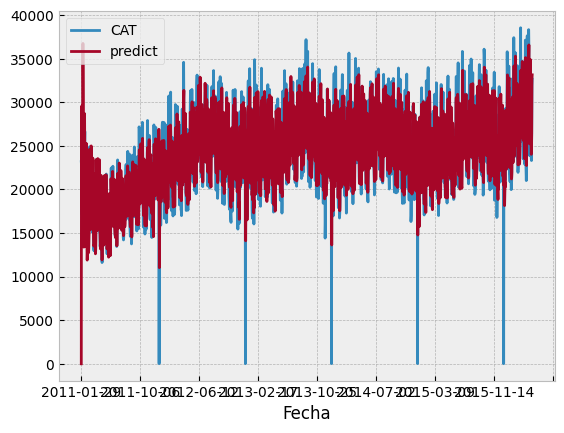

In [20]:
#Entrenamiento final del modelo para una variable
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
import warnings
order,seasonal_order=((1, 1, 2),(2, 1, 1,7))

model = SARIMAX(past_cat, order=order, seasonal_order=seasonal_order)
model.initialize_approximate_diffuse()
results = model.fit(disp=False)

data_init=pd.DataFrame(past_cat,columns=["CAT"])
data_init["predict"]=results.predict(start=0,end=past_sales.shape[0]-1)

data_init.plot()

In [21]:
#Modelo prueba para espacio
results.save("SARIMAX.pkl")

In [33]:
from statsmodels.tools.eval_measures import rmse
rmse(data_init["CAT"],data_init["predict"])

2995.0439477196237

In [34]:
import os
cpu_percent = psutil.cpu_percent()
process = psutil.Process(os.getpid())
mem_info = process.memory_info()
memory_mb = mem_info.rss / 1024 / 1024
cpu_percent,memory_mb

(5.4, 696.6640625)

(1, 1, 1, 1, 1, 1)
(1, 1, 1) (1, 1, 1, 7)
(1, 1, 1, 1, 1, 2)
(1, 1, 1) (1, 1, 2, 7)
(1, 1, 1, 1, 2, 1)
(1, 1, 1) (1, 2, 1, 7)
(1, 1, 1, 1, 2, 2)
(1, 1, 1) (1, 2, 2, 7)
(1, 1, 1, 2, 1, 1)
(1, 1, 1) (2, 1, 1, 7)
(1, 1, 1, 2, 1, 2)
(1, 1, 1) (2, 1, 2, 7)
(1, 1, 1, 2, 2, 1)
(1, 1, 1) (2, 2, 1, 7)
(1, 1, 1, 2, 2, 2)
(1, 1, 1) (2, 2, 2, 7)
(1, 1, 2, 1, 1, 1)
(1, 1, 2) (1, 1, 1, 7)
(1, 1, 2, 1, 1, 2)
(1, 1, 2) (1, 1, 2, 7)
(1, 1, 2, 1, 2, 1)
(1, 1, 2) (1, 2, 1, 7)
(1, 1, 2, 1, 2, 2)
(1, 1, 2) (1, 2, 2, 7)
(1, 1, 2, 2, 1, 1)
(1, 1, 2) (2, 1, 1, 7)
(1, 1, 2, 2, 1, 2)
(1, 1, 2) (2, 1, 2, 7)
(1, 1, 2, 2, 2, 1)
(1, 1, 2) (2, 2, 1, 7)
(1, 1, 2, 2, 2, 2)
(1, 1, 2) (2, 2, 2, 7)
(1, 2, 1, 1, 1, 1)
(1, 2, 1) (1, 1, 1, 7)
(1, 2, 1, 1, 1, 2)
(1, 2, 1) (1, 1, 2, 7)
(1, 2, 1, 1, 2, 1)
(1, 2, 1) (1, 2, 1, 7)
(1, 2, 1, 1, 2, 2)
(1, 2, 1) (1, 2, 2, 7)
(1, 2, 1, 2, 1, 1)
(1, 2, 1) (2, 1, 1, 7)
(1, 2, 1, 2, 1, 2)
(1, 2, 1) (2, 1, 2, 7)
(1, 2, 1, 2, 2, 1)
(1, 2, 1) (2, 2, 1, 7)
(1, 2, 1, 2, 2, 2)
(1, 2, 1) (2, 2

(4.3, 587.6875)

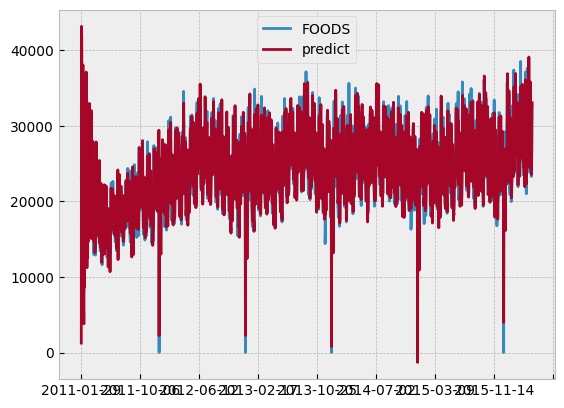

In [38]:
#entrenamiento para varias variables

import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
import warnings

# warnings.simplefilter('once', category=UserWarning)
# warnings.simplefilter('always', category=UserWarning)
# cat='HOUSEHOLD'
# cat='HOBBIES'
cat='FOODS'
past_sales
items_col = [c for c in past_sales.columns if cat in c]
past_cat=past_sales[items_col] \
        .sum(axis=1)
warnings.filterwarnings('ignore') 
combinations = list(itertools.product([1,2], repeat=6))
# , 2
score=[]
data_exo=pd.DataFrame(past_cat,columns=[cat]).merge(cal2.set_index("date"),left_index=True, right_index=True)

for combo in combinations:
    print(combo)

    
    

    order = combo[:3]#(1, 1, 1)
    seasonal_order = tuple(list(combo[3:])+[order_max])#(1, 1, 1, 7)
    print(order,seasonal_order)
  
    model = SARIMAX(endog=data_exo[cat],exog=data_exo.drop(cat,axis=1), order=order, seasonal_order=seasonal_order)
    model.initialize_approximate_diffuse()
    results = model.fit(disp=False)
    score.append(results.bic)

score_f=score[score.index(min(score))]
comb_f=combinations[score.index(min(score))]
order =combo[:3]#(1, 1, 1)# (1, 1, 1)
seasonal_order = tuple(list(combo[3:])+[7])#(1, 1, 1, 7)#(1, 2, 2,7)


model = SARIMAX(endog=data_exo[cat],exog=data_exo.drop(cat,axis=1), order=order, seasonal_order=seasonal_order)
model.initialize_approximate_diffuse()
results = model.fit(disp=False)
data_init2=data_exo[[cat]]
data_init2["predict"]=results.predict(start=0,end=data_exo.shape[0]-1,exog=data_exo.drop(cat,axis=1))
data_init2.plot()


import os
cpu_percent = psutil.cpu_percent()
process = psutil.Process(os.getpid())
mem_info = process.memory_info()
memory_mb = mem_info.rss / 1024 / 1024
cpu_percent,memory_mb

In [39]:
from statsmodels.tools.eval_measures import rmse

print(rmse(data_init2[cat],data_init2["predict"]))

import os
cpu_percent = psutil.cpu_percent()
process = psutil.Process(os.getpid())
mem_info = process.memory_info()
memory_mb = mem_info.rss / 1024 / 1024
cpu_percent,memory_mb


2336.5443634405224


(0.9, 529.37890625)

In [40]:
#Visualización de scores
pd.DataFrame(zip(score,combinations),columns=["score","conf"]).sort_values("score").to_csv("SARIMAX_FOODS.csv")
pd.DataFrame(zip(score,combinations),columns=["score","conf"]).sort_values("score").head(10),pd.DataFrame(zip(score,combinations),columns=["score","conf"]).sort_values("score").tail(10)

<AxesSubplot:>

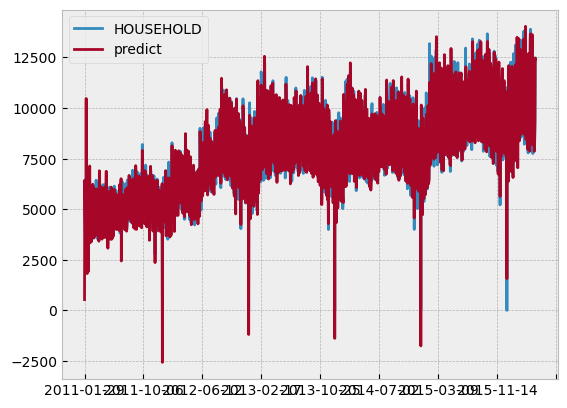

In [172]:

data_exo=pd.DataFrame(past_cat,columns=[cat]).merge(cal2.set_index("date"),left_index=True, right_index=True)
model1 = SARIMAX(endog=data_exo["HOUSEHOLD"],exog=data_exo.drop("HOUSEHOLD",axis=1), order=order, seasonal_order=seasonal_order)
model1.initialize_approximate_diffuse()
data_init2=data_exo[["HOUSEHOLD"]]#pd.DataFrame(past_cat,columns=["CAT"])
results2 = model1.fit(disp=False)
data_init2["predict"]=results2.predict(start=0,end=data_exo.shape[0]-1,exog=data_exo.drop("HOUSEHOLD",axis=1))
data_init2.plot()


In [173]:
from statsmodels.tools.eval_measures import rmse
rmse(data_init["CAT"],data_init["predict"]),rmse(data_init2["HOUSEHOLD"],data_init2["predict"])


(898.0429979356724, 630.9694898682003)

In [340]:
#prueba con una sola variable para redes neuronales
#array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)
cat='HOUSEHOLD'
# cat='HOBBIES'
# cat='FOODS'
past_sales
items_col = [c for c in past_sales.columns if cat in c]
past_cat=past_sales[items_col] \
        .sum(axis=1)
# pd.DataFrame(past_cat,columns=[cat]).merge(cal2.set_index("date"),left_index=True, right_index=True)
data_init=pd.DataFrame(past_cat,columns=["CAT"])

import os
cpu_percent = psutil.cpu_percent()
process = psutil.Process(os.getpid())
mem_info = process.memory_info()
memory_mb = mem_info.rss / 1024 / 1024
cpu_percent,memory_mb

(3.4, 1062.640625)

In [29]:
#prueba con varias variables para redes neuronales
# cat='HOUSEHOLD'
# cat='HOBBIES'
cat='FOODS'
past_sales
items_col = [c for c in past_sales.columns if cat in c]
past_cat=past_sales[items_col] \
        .sum(axis=1)
warnings.filterwarnings('ignore') 
combinations = list(itertools.product([1,2], repeat=6))
# , 2
score=[]
data_exo=pd.DataFrame(past_cat,columns=[cat]).merge(cal2.set_index("date"),left_index=True, right_index=True).rename({cat:"CAT"},axis=1)

In [26]:
#Entrenamiento grid search 
from math import sqrt
from numpy import array
from numpy import mean
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten , Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras import backend as K
from random import sample
from numpy import array
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

def train_test_split(data, n_test):
	
	return data.iloc[:-n_test], data.iloc[-n_test:]

def difference(data, order):
	data["CAT"]=data["CAT"]-data.shift(order)["CAT"]
	data=data.dropna(axis=0,how="any")
	return data

def dataset_train(train1,nam_col="CAT"):

	out_seq = array(train1[nam_col].shift(-1))
	out_seq = out_seq.reshape((len(out_seq), 1))

	count=1
	for i in train1.columns:
		
		in_seq=array(train1[i])
		in_seq = in_seq.reshape((len(in_seq), 1))
		if count==1:
			dataset=np.hstack((in_seq,out_seq))
			count+=1
			
		else:
			dataset=np.hstack((in_seq,dataset))
			
	dataset = dataset[:-1]
	
	return dataset


def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
    
        if out_end_ix > len(sequences):
    
            break
    
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

def model_fit(train, config):
	n_input, n_filters, n_kernel, n_epochs, n_batch, n_diff, optimizer1,learn_rate, init_mode, activation1 = config
	if n_diff > 0:
		train = difference(train, n_diff)
	
	train=dataset_train(train)
	train_x, train_y = split_sequences(train, n_input,1)
	print(train_x.shape,train_y.shape)
	n_features=train_x.shape[2]
	
	model = Sequential()
	model.add(Conv1D(filters=n_filters, kernel_size=n_kernel, activation=activation1, input_shape=(n_input, n_features), kernel_initializer=init_mode))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(1))
	model.compile(loss='mse', optimizer=optimizer1)
	K.set_value(model.optimizer.learning_rate, learn_rate)
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return [model, train_x, train_y] 



def model_predict(model, history, config):
	# unpack config
	n_input, _, _, _, _, n_diff, _, _, _, _ = config
	# prepare data
	correction = 0.0
	
	
	if n_diff > 0:
		
		correction = history.reset_index(drop=True).loc[history.shape[0]-n_diff,"CAT"]
		
	if n_diff > 0:
		history1 = difference(history.copy(), n_diff)
	else :
		history1 = history.copy()	
	x_input=np.array(history1.iloc[-n_input:]).reshape(1,n_input,history1.shape[1])
	
	yhat = model.predict(x_input, verbose=0)
	
	return correction + yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	
	train, test = train_test_split(data, n_test)
	
	history = train.reset_index(drop=True)
	model,train_x,train_y = model_fit(train, cfg)
	
	# step over each time-step in the test set
	for i in range(len(test)):
		
		yhat = model_predict(model, history, cfg)
		
		predictions.append(yhat)
		
		history=pd.concat([history,test.iloc[i:i+1]])
		
	print(pd.DataFrame({"CAT":test["CAT"],"pred":predictions}))
	try:
		error = measure_rmse(model.predict(train_x), train_y)
		# error = measure_rmse(test["CAT"], predictions)
	except:
		error= 10000000000
	print(' > %.3f' % error)
	return error

def model_fit_lstm(train, config):
	
	n_input, n_filters, n_kernel, n_epochs, n_batch, n_diff, optimizer1,learn_rate, init_mode, activation1 = config
	
	if n_diff > 0:
		train = difference(train, n_diff)
	
	train=dataset_train(train)
	
	train_x, train_y = split_sequences(train, n_input,1)
	print(train_x.shape,train_y.shape)
	n_features=train_x.shape[2]

	model = Sequential()
	model.add(LSTM(n_filters, activation=activation1, input_shape=(n_input, n_features),kernel_initializer=init_mode))
	model.add(Dense(n_filters, activation=activation1))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer=optimizer1)
	
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)

	K.set_value(model.optimizer.learning_rate, learn_rate)
	
	return [model, train_x, train_y] 

def walk_forward_validation_lstm(data, n_test, cfg):
	predictions = list()
	
	train, test = train_test_split(data, n_test)
	
	history = train.reset_index(drop=True)
	
	model,train_x,train_y = model_fit_lstm(train, cfg)

	
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = model_predict(model, history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history=pd.concat([history,test.iloc[i:i+1]])
		
	# estimate prediction error
	print(pd.DataFrame({"CAT":test["CAT"],"pred":predictions}))
	try:
		error = measure_rmse(model.predict(train_x), train_y)
		
	except:
		error= 10000000000
	print(' > %.3f' % error)
	return error



# score a model, return None on failure
def repeat_evaluate(data, config, n_test,tip_mod, n_repeats=2):
	# convert config to a key
	key = config
	
	if tip_mod==1:
		print("se correra modelos cnn")
		scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
			# summarize score
		result = mean(scores)
	elif tip_mod==2:
		scores = [walk_forward_validation_lstm(data, n_test, config) for _ in range(n_repeats)]
			# summarize score
		result = mean(scores)	
	
	print('> Model[%s] %.3f' % (str(key), result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, tip_mod=1):
	# evaluate configs
	scores = [repeat_evaluate(data, cfg, n_test, tip_mod) for cfg in cfg_list]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a list of configs to try
def model_configs():

	###########################
	# define scope of configs
	n_input = [7,14]
	n_filters = [20,50,100]
	n_kernels = [3, 5]
	n_epochs = [40]
	n_batch = [32,128,500]#,64]
	n_diff = [0,7]#, 7]
	optimizer = ['adam', 'Adamax','Adagrad']#['adam','SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
	learn_rate = [0.001, 0.1]#, 0.01, 0.3
	#momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
	init_mode = ['uniform', 'lecun_uniform','normal']#['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
	activation = ['linear','relu','softplus']#['relu','softmax', 'softplus', 'softsign', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
	###################################

	
	num_comb=0.03
	configs = list(itertools.product(n_input,n_filters,n_kernels,n_epochs,n_batch,n_diff,optimizer,learn_rate,init_mode,activation))
	if num_comb>1:
		configs = sample(configs,int(num_comb))
	else:
		configs = sample(configs,int(len(configs)*num_comb))
	print('Total configs: %d' % len(configs))
	return configs


########## correr para mejora de hiperparametros
# define dataset
series = data_init[["CAT"]]
data=series

#multiple
# data= data_exo#series

# data split
n_test = 7
# model configs
cfg_list = model_configs()
# grid search
scores = grid_search(data, cfg_list, n_test,1)
print('done')
# list top 10 configs
for cfg, error in scores[:3]:
	print(cfg, error)
import os
cpu_percent = psutil.cpu_percent()
process = psutil.Process(os.getpid())
mem_info = process.memory_info()
memory_mb = mem_info.rss / 1024 / 1024
cpu_percent,memory_mb	

# Guardar scores

In [342]:
# pd.DataFrame(scores,columns=["conf","score"]).to_csv("CNN_Food.csv")
scores


[((14, 100, 5, 40, 32, 7, 'adam', 0.001, 'uniform', 'linear'),
  771.977924181572),
 ((14, 100, 5, 40, 32, 0, 'adam', 0.001, 'uniform', 'softplus'),
  774.0202173114046),
 ((14, 20, 5, 40, 500, 7, 'adam', 0.1, 'lecun_uniform', 'relu'),
  782.8952518147976),
 ((14, 100, 5, 40, 500, 7, 'adam', 0.1, 'normal', 'linear'),
  782.9253087632513),
 ((14, 50, 3, 40, 128, 7, 'Adagrad', 0.1, 'normal', 'relu'),
  786.2057176975206),
 ((14, 50, 3, 40, 128, 7, 'Adagrad', 0.1, 'uniform', 'relu'),
  786.7634889660206),
 ((14, 20, 5, 40, 500, 7, 'Adagrad', 0.1, 'uniform', 'relu'),
  787.105720111221),
 ((14, 100, 3, 40, 128, 7, 'adam', 0.001, 'lecun_uniform', 'linear'),
  788.1863964127215),
 ((14, 100, 3, 40, 32, 7, 'Adagrad', 0.1, 'normal', 'linear'),
  788.9135073299874),
 ((14, 50, 5, 40, 500, 7, 'Adagrad', 0.1, 'normal', 'softplus'),
  792.2074523976648),
 ((14, 20, 5, 40, 32, 0, 'Adamax', 0.1, 'uniform', 'linear'),
  796.0050220871285),
 ((14, 50, 5, 40, 32, 0, 'Adamax', 0.001, 'lecun_uniform', 's

# Correr para lstm

In [2]:
# pd.set_option('display.max_colwidth', None)

# data= data_exo#series
# # print(data)
# #data = series.values
# # data split
# n_test = 7
# # model configs
# cfg_list = model_configs()

z=pd.DataFrame([dict(scores).values(),dict(scores).keys()]).T.sort_values(0).head(30)

test_f, train_f = train_test_split(data, len(data))

z=train_f.copy()
sco=list(scores[0][0])
# sco=[7,100,3,15000,32,7,"Adamax",0.001,"uniform","linear"]
# [7, 100, 5, 25, 128, 7, 'adam', 0.1, 'normal', 'relu']#
sco[3]=100
model = model_fit_lstm(train_f, sco)
# z1=train_f.copy()
model,train_fx,train_fy=model[0],model[1],model[2]
train_fx
predict=model.predict(train_fx)

datos_predf=pd.DataFrame({"Y":list(train_fy.reshape(len(train_fy))),"Y_pred":list(predict.reshape(len(predict)))})
datos_predf.plot()
from statsmodels.tools.eval_measures import rmse
print(rmse(datos_predf["Y"],datos_predf["Y_pred"]))

datos_plot=datos_predf.copy()
datos_plot["Y"]=datos_predf["Y"]+z.shift(7).dropna().reset_index(drop=True).loc[7:].reset_index(drop=True)["CAT"]
datos_plot["Y_pred"]=datos_predf["Y_pred"]+z.shift(7).dropna().reset_index(drop=True).loc[7:].reset_index(drop=True)["CAT"]

datos_plot.plot()
print(rmse(datos_plot["Y"],datos_plot["Y_pred"]))
datos_plot


# Correr para CNN


(1899, 7, 1) (1899, 1)
60/60 [==============================] - 0s 1ms/step
2723.8634882513993
2723.8634882513993


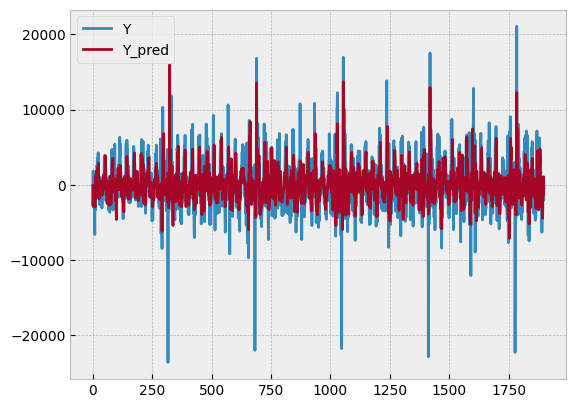

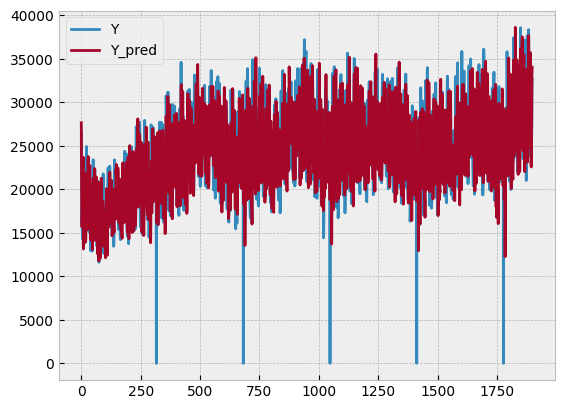

In [30]:
pd.set_option('display.max_colwidth', None)

# series = data_init[["CAT"]]
# data=series


test_f, train_f = train_test_split(data, len(data))
# train
z=train_f.copy()

# sco=list(scores[0][0])
sco=[7,50,5,18,500,7, "Adagrad", 0.1, "normal", "softplus"]
sco[3]=1000
model = model_fit(train_f, sco)
# z1=train_f.copy()
model,train_fx,train_fy=model[0],model[1],model[2]
train_fx
predict=model.predict(train_fx)

datos_predf=pd.DataFrame({"Y":list(train_fy.reshape(len(train_fy))),"Y_pred":list(predict.reshape(len(predict)))})
datos_predf.plot()
from statsmodels.tools.eval_measures import rmse
print(rmse(datos_predf["Y"],datos_predf["Y_pred"]))

datos_plot=datos_predf.copy()
datos_plot["Y"]=datos_predf["Y"]+z.shift(7).dropna().reset_index(drop=True).loc[7:].reset_index(drop=True)["CAT"]
datos_plot["Y_pred"]=datos_predf["Y_pred"]+z.shift(7).dropna().reset_index(drop=True).loc[7:].reset_index(drop=True)["CAT"]

datos_plot.plot()
print(rmse(datos_plot["Y"],datos_plot["Y_pred"]))

In [31]:
model.save("CNN.h5")